In [1]:
#Usual suspects
import matplotlib.pyplot as plt
import torch
import numpy as np
from typing import Tuple

# Muon Scattering Tomography data file

In Muon Scattering Tomography (MST), we are interested in measuring muon's direction before and after it interacts the Volume of Interest (VOI), as show on the figure below.

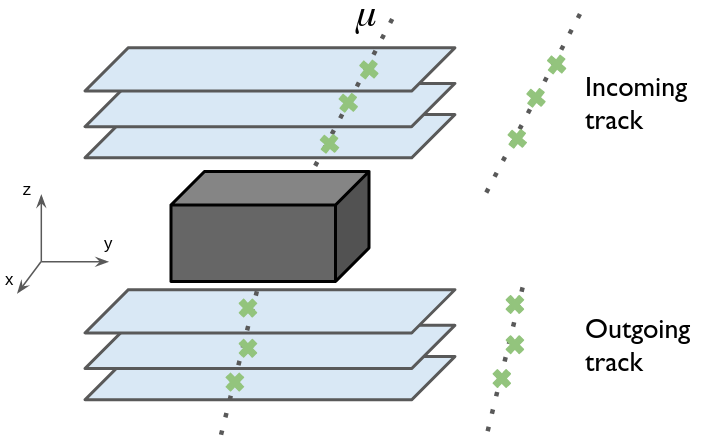

For each muon, the detector gives a position measurement for each detector panel. For a detector setup with 6 detection planes (3 on top and 3 below the VOI), we excpect the followong data set:

In [2]:
import pandas as pd
df = pd.read_csv("../data/DataCu.csv")
df.head()

,Event,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,X4,Y4,Z4,X5,Y5,Z5,E
0,3,396.344,209.6560,-55.6,378.947,221.2150,-135.6,291.962,279.0080,-535.6,161.4740,365.6910,-1135.6,74.4866,423.473,-1535.6,57.0893,435.029,-1615.6,1927.980
1,12,383.618,97.2082,-55.6,344.670,95.2144,-135.6,149.941,85.2355,-535.6,-127.3830,93.4317,-1135.6,-299.3230,115.793,-1535.6,-333.7090,120.264,-1615.6,661.617
2,34,402.733,-212.8870,-55.6,368.678,-187.0680,-135.6,198.403,-57.9725,-535.6,-57.0133,135.6710,-1135.6,-227.2980,264.771,-1535.6,-261.3560,290.592,-1615.6,3351.900
3,41,-289.739,-249.2930,-55.6,-269.810,-216.0230,-135.6,-170.166,-49.6759,-535.6,-20.6950,199.8390,-1135.6,78.9538,366.186,-1535.6,98.8835,399.455,-1615.6,5310.730
4,45,466.338,-216.5230,-55.6,457.783,-184.2540,-135.6,415.015,-22.9226,-535.6,350.8140,219.1870,-1135.6,307.9460,380.652,-1535.6,299.3630,412.931,-1615.6,125.377


Each detector provides a X and Y position measurement. **Assuming** a **perfect detector alignment** and **calibration**, each muon traverses a given plane at the same $z$ position.

## 1 - Formatting input file

In order to use these recorded hits for image reconstruction purposes, one needs to use a more convenient data structure than csv. Let us use `numpy.ndarray`:

In [3]:
# Compute # planes from csv
n_plane = len([col for col in df.columns if "X" in col])

# Create array 
hits = np.zeros((3,n_plane,len(df)))

# Fill in array with csv file entries
for plane in range(n_plane):
    hits[0,plane] = df['X'+str(plane)]
    hits[1,plane] = df['Y'+str(plane)]    
    hits[2,plane] = df['Z'+str(plane)]

### **Exercice 1**: 

Create a function which takes as **input** the csv **filename** and returns the hits in an `np.ndarray` with shape (3,n_plane,n_events).

In [8]:
def get_hits_from_csv(filename:str,) -> np.ndarray:
    
    df = pd.read_csv(filename)
    
    # Compute # planes from csv
    n_plane = len([col for col in df.columns if "X" in col])
    
    # Create array 
    hits = np.zeros((3,n_plane,len(df)))
    
    # Fill in array with csv file entries
    for plane in range(n_plane):
        hits[0,plane] = df['X'+str(plane)]
        hits[1,plane] = df['Y'+str(plane)]    
        hits[2,plane] = df['Z'+str(plane)]

    return hits

**Test 1**: Run the test to make sure everything is working fine.

In [9]:
def test_get_hits_from_csv(filename) -> None:
    import numpy as np
    hits = get_hits_from_csv("../data/DataCu.csv")
    
    assert type(hits) == np.ndarray
    assert np.shape(hits) == (3, 6, 237887)
    assert hits[:,0,2167].tolist()==[303.143,-308.498,-55.6]
    
test_get_hits_from_csv("../data/DataCu.csv")

## 2 - Creating library

Now that we have a function that works, let's save it in a remote file. We will then import it when needed.

### **Exercice 2**: 

 - Create a txt file called utils.py
 - Make sure you import relevant libraries (e.g `import numpy as np`)
 - Copy paste your `get_hits_from_csv()` function
 - Save the file and place it in the `../muograph/utils/` directory
 
**Test 2**: After restarting the kernel, make sure you can import the `get_hits_from_csv()` function.

In [10]:
# Restart the kernel
import sys
sys.path.insert(1,'../muograph/')

# import get_hits_from_csv
from utils.utils import get_hits_from_csv

# test
test_get_hits_from_csv("../data/DataCu.csv")

<!-- ## Spatial resolution

Detector panels are not perfect, and record muon position $x$ with a certain precision. $\sigma_x$ is the spatial resolution and is defined as the standard deviation $\sigma$ of the distribution of the error on position measurement  $\delta_x$:$$\sigma_x = \sigma\left(\delta_x\right)$$ -->

In [11]:
# # True position
# x_true = np.random.random(size=10000)

# # Gaussian noise
# error_1 = np.random.normal(loc=0,scale=0.1,size=10000)
# error_2 = np.random.normal(loc=0,scale=0.05,size=10000)

# # Reconstructed position
# x_rec = x_true + error_1 - error_2

# # Plot error distribution
# fig,ax = plt.subplots()
# ax.hist(x_rec-x_true, bins=50, label=r'$\sigma_x$ = {:.3f}'.format(np.std(x_rec-x_true)),alpha=.5)
# ax.axvline(x=np.mean(x_rec-x_true),label='mean = {:.3f}'.format(np.mean(x_rec-x_true)),color='red')
# ax.set_xlabel(r"Error on $x$ measurement $\delta_x$")
# ax.legend()
# plt.show()